**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
# Mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [17]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [18]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [19]:
# Load Data
file_path = '/content/drive/MyDrive/Colab Notebooks/Lab 5/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [20]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [21]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price

#time_step = 30
#time_step = 600

X, y = create_dataset(data, time_step)

In [22]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [23]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [24]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
#model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))


#model.add(LSTM(units=5, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=250, return_sequences=True, input_shape=(time_step, 1)))

  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

#model.add(Dropout(0.001))
model.add(Dropout(0.7))


model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [25]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.3651
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.1276
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.1079
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.1014
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0938
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 0.0932
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0982
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0950
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0854
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.1085
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.1167
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.1052
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0870
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0988
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0909
Epoch 16/20
5/5 ━━━

In [26]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step


In [27]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

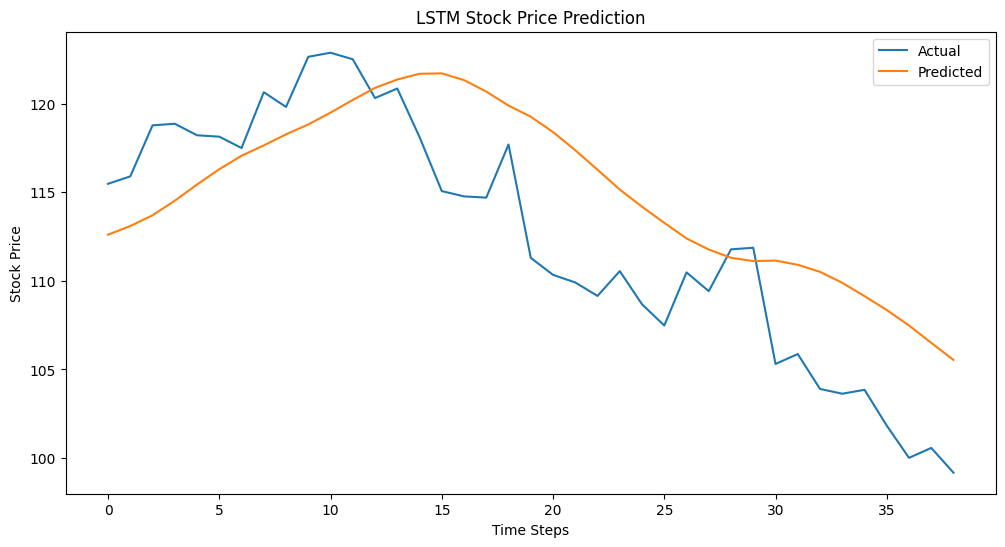

In [28]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


Question 1:

Normalization scales all stock prices to the same range (0-1) so the neural network can train more efficiently. Without it, large price differences would make the model focus too much on bigger numbers and ignore smaller ones.

Question 2:
Dropout prevents overfitting by randomly turning off 20% of neurons during training. This stops the model from memorizing the training data and helps it make better predictions on new data.

Question 3:

It indicates the model is performing well and has successfully learned the stock price patterns. When the lines follow similar trends, the LSTM is making accurate predictions.